## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


## Load and Prepare Data

In [2]:
data = pd.read_csv('country_vaccinations_by_manufacturer.csv')
data

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
9152,Uruguay,2021-07-14,Pfizer/BioNTech,1229299
9153,Uruguay,2021-07-14,Sinovac,3140277
9154,Uruguay,2021-07-15,Oxford/AstraZeneca,61907
9155,Uruguay,2021-07-15,Pfizer/BioNTech,1255929


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9157 non-null   object
 1   date                9157 non-null   object
 2   vaccine             9157 non-null   object
 3   total_vaccinations  9157 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 286.3+ KB


## Data Preprocessing

In [4]:
d=data[['date','total_vaccinations']]
d

,date,total_vaccinations
0,2021-01-08,0
1,2021-01-08,0
2,2021-01-08,0
3,2021-01-08,30974
4,2021-01-15,0
...,...,...
9152,2021-07-14,1229299
9153,2021-07-14,3140277
9154,2021-07-15,61907
9155,2021-07-15,1255929


In [5]:
dates=d.date.unique()
dates

array(['2021-01-08', '2021-01-15', '2021-01-22', '2021-01-29',
       '2021-02-05', '2021-02-12', '2021-02-19', '2021-02-26',
       '2021-03-05', '2021-03-12', '2021-03-19', '2021-03-26',
       '2021-04-02', '2021-04-09', '2021-04-16', '2021-04-23',
       '2021-04-30', '2021-05-07', '2021-05-14', '2021-05-21',
       '2021-05-28', '2021-06-04', '2021-06-11', '2021-06-18',
       '2021-06-25', '2021-07-02', '2021-07-09', '2021-07-13',
       '2021-01-01', '2020-12-24', '2020-12-25', '2020-12-26',
       '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-09',
       '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
       '2021-01-14', '2021-01-16', '2021-01-17', '2021-01-18',
       '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-23',
       '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
       '2021-01-28', '2021-01-30', '2021-01-31', '2021-

In [6]:
import pandas as pd

# Assuming dates_totalvalues_list is already created as described
# If not, here is the optimized code again for clarity:

dates_totalvalues = d.groupby('date')['total_vaccinations'].sum().reset_index()
dates_totalvalues_list = list(dates_totalvalues.itertuples(index=False, name=None))

# Create a DataFrame from the list of tuples
optimized_data = pd.DataFrame(dates_totalvalues_list, columns=['date', 'total_vaccinations'])

# Assign index values (if needed to be specific 0 to 207, otherwise default index can be used)
optimized_data.index = range(208)



         

In [7]:
optimized_data

,date,total_vaccinations
0,2020-12-04,1
1,2020-12-16,1
2,2020-12-20,4
3,2020-12-22,3
4,2020-12-24,420
...,...,...
203,2021-07-11,655898019
204,2021-07-12,651261346
205,2021-07-13,790840577
206,2021-07-14,634194987


In [8]:
optimized_data['month']=optimized_data.date.str[5:7].astype(float)
optimized_data['day'] = optimized_data.date.str[8:10].astype(float)
optimized_data['year'] =optimized_data.date.str[:4].astype(float)

In [9]:
optimized_data

,date,total_vaccinations,month,day,year
0,2020-12-04,1,12.0,4.0,2020.0
1,2020-12-16,1,12.0,16.0,2020.0
2,2020-12-20,4,12.0,20.0,2020.0
3,2020-12-22,3,12.0,22.0,2020.0
4,2020-12-24,420,12.0,24.0,2020.0
...,...,...,...,...,...
203,2021-07-11,655898019,7.0,11.0,2021.0
204,2021-07-12,651261346,7.0,12.0,2021.0
205,2021-07-13,790840577,7.0,13.0,2021.0
206,2021-07-14,634194987,7.0,14.0,2021.0


In [10]:
print('The goal is to reassure that for every date there is just one number')

optimized_data.date.value_counts()

The goal is to reassure that for every date there is just one number


date
2020-12-04    1
2020-12-16    1
2021-05-01    1
2021-05-02    1
2021-05-03    1
             ..
2021-03-02    1
2021-03-03    1
2021-03-04    1
2021-03-05    1
2021-07-15    1
Name: count, Length: 208, dtype: int64

In [11]:
x = optimized_data.loc[:,['month','day','year']].values
y = optimized_data.loc[:,'total_vaccinations'].values

In [12]:
x

array([[1.200e+01, 4.000e+00, 2.020e+03],
       [1.200e+01, 1.600e+01, 2.020e+03],
       [1.200e+01, 2.000e+01, 2.020e+03],
       [1.200e+01, 2.200e+01, 2.020e+03],
       [1.200e+01, 2.400e+01, 2.020e+03],
       [1.200e+01, 2.500e+01, 2.020e+03],
       [1.200e+01, 2.600e+01, 2.020e+03],
       [1.200e+01, 2.700e+01, 2.020e+03],
       [1.200e+01, 2.800e+01, 2.020e+03],
       [1.200e+01, 2.900e+01, 2.020e+03],
       [1.200e+01, 3.000e+01, 2.020e+03],
       [1.200e+01, 3.100e+01, 2.020e+03],
       [1.000e+00, 1.000e+00, 2.021e+03],
       [1.000e+00, 2.000e+00, 2.021e+03],
       [1.000e+00, 3.000e+00, 2.021e+03],
       [1.000e+00, 4.000e+00, 2.021e+03],
       [1.000e+00, 5.000e+00, 2.021e+03],
       [1.000e+00, 6.000e+00, 2.021e+03],
       [1.000e+00, 7.000e+00, 2.021e+03],
       [1.000e+00, 8.000e+00, 2.021e+03],
       [1.000e+00, 9.000e+00, 2.021e+03],
       [1.000e+00, 1.000e+01, 2.021e+03],
       [1.000e+00, 1.100e+01, 2.021e+03],
       [1.000e+00, 1.200e+01, 2.02

In [13]:
y

array([        1,         1,         4,         3,       420,      5197,
            8340,     44665,     70818,    132441,    211832,    293048,
          348391,    420601,    479654,    612446,    772990,    938919,
         1144486,   2615168,   1540576,   1649879,   1868056,  11446747,
        12704060,   2732485,  17974681,   3183759,   3290667,   3563217,
        19625030,  20811251,  22193493,  28188084,  25689692,  27121233,
        28206165,  29355194,  30821663,  32744951,  40739571,  36740979,
        38430249,  39854499,  40799978,  42483859,  44408617,  54599675,
        49082091,  51387383,  53149877,  54597116,  56880911,  59231315,
        72045321,  64433668,  67361684,  15229208,  71001151,  72733021,
        74867219,  90050960,  79319614,  81296261,  82983053,  84421335,
        86489121,  88984837, 107751364,  94497893,  97135187,  99524053,
       102100390, 105083646, 108320628, 131474796, 115469714, 118280873,
       121267981, 124119327, 127502440, 131407480, 

In [14]:
y=y/1000000
print('Because the data is too huge and it\'s better to present it per million')


Because the data is too huge and it's better to present it per million


In [17]:
y

array([1.00000000e-12, 1.00000000e-12, 4.00000000e-12, 3.00000000e-12,
       4.20000000e-10, 5.19700000e-09, 8.34000000e-09, 4.46650000e-08,
       7.08180000e-08, 1.32441000e-07, 2.11832000e-07, 2.93048000e-07,
       3.48391000e-07, 4.20601000e-07, 4.79654000e-07, 6.12446000e-07,
       7.72990000e-07, 9.38919000e-07, 1.14448600e-06, 2.61516800e-06,
       1.54057600e-06, 1.64987900e-06, 1.86805600e-06, 1.14467470e-05,
       1.27040600e-05, 2.73248500e-06, 1.79746810e-05, 3.18375900e-06,
       3.29066700e-06, 3.56321700e-06, 1.96250300e-05, 2.08112510e-05,
       2.21934930e-05, 2.81880840e-05, 2.56896920e-05, 2.71212330e-05,
       2.82061650e-05, 2.93551940e-05, 3.08216630e-05, 3.27449510e-05,
       4.07395710e-05, 3.67409790e-05, 3.84302490e-05, 3.98544990e-05,
       4.07999780e-05, 4.24838590e-05, 4.44086170e-05, 5.45996750e-05,
       4.90820910e-05, 5.13873830e-05, 5.31498770e-05, 5.45971160e-05,
       5.68809110e-05, 5.92313150e-05, 7.20453210e-05, 6.44336680e-05,
      

## Strorytelling - Visualization

In [15]:
print('the most used vaccine are')

print(data.vaccine.value_counts())


the most used vaccine are
vaccine
Pfizer/BioNTech       2963
Moderna               2379
Oxford/AstraZeneca    2049
Johnson&Johnson       1357
Sinovac                300
Sputnik V               44
CanSino                 43
Sinopharm/Beijing       22
Name: count, dtype: int64


In [16]:
print(f'the data are cllocted from {len(data.location.value_counts())} countries and they are  \n{data.location.value_counts()}' )


the data are cllocted from 33 countries and they are  
location
Germany          804
Iceland          796
Italy            646
Lithuania        635
Latvia           627
Czechia          625
France           624
Romania          577
United States    484
Chile            481
Uruguay          417
Switzerland      296
Japan            185
Hungary          140
Netherlands      116
Poland           116
Finland          114
Slovakia         114
Austria          112
Spain            112
Croatia          103
Portugal         103
Ireland           98
Luxembourg        96
Bulgaria          95
Estonia           93
Belgium           92
Slovenia          86
Cyprus            84
Denmark           83
Sweden            80
Malta             79
Liechtenstein     44
Name: count, dtype: int64


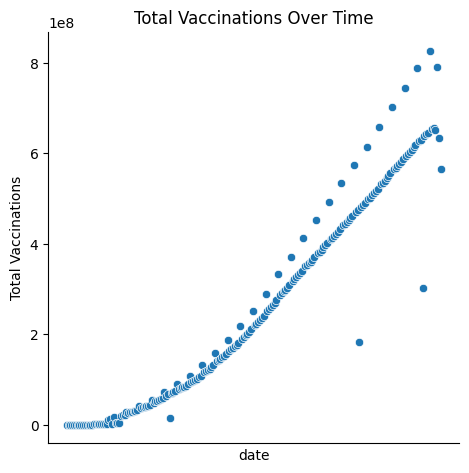

In [17]:
# Create the scatter plot
sns.relplot(x="date", y="total_vaccinations", data=optimized_data)

# Customize the plot
plt.title('Total Vaccinations Over Time')

plt.xticks([])  # Remove x-axis tick labels
plt.ylabel('Total Vaccinations')  # Ensure y-axis label is meaningful

# Show the plot
plt.show()



In sum of all countries and in the world


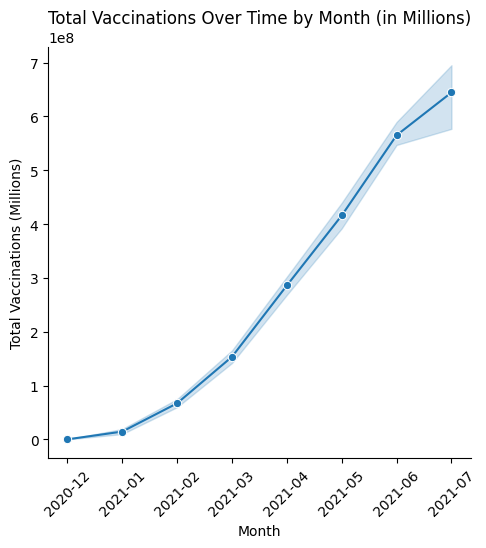

In [18]:
# Convert the 'date' column to datetime format if it is not already
optimized_data['date'] = pd.to_datetime(optimized_data['date'])

# Extract the month from the date and create a new column
optimized_data['month'] = optimized_data['date'].dt.to_period('M').astype(str)

# Print the message
print('In sum of all countries and in the world')

# Create the scatter plot
sns.relplot(x="month", y="total_vaccinations", data=optimized_data, kind='line', marker='o')

# Customize the plot
plt.title('Total Vaccinations Over Time by Month (in Millions)')
plt.xlabel('Month')
plt.ylabel('Total Vaccinations (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Prepare Data for Machine learning

In [19]:
data_dmatrix = xgb.DMatrix(x,label=y)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=85)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 3)
(166,)
(42, 3)
(42,)


## Train your model

In [20]:
from sklearn.model_selection import GridSearchCV

parametrs =      [{'learning_rate': [0.01,0.03,0.04,0.05,0.06,0.07,0.1],'subsample':[0.5,0.6,0.7,0,8,0.9]
                   ,'max_depth':[1,2,3,4,5,7,8],'gamma':[0,0.1,0,2,0,3,0.4,0.5,0.6]}]



In [21]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [22]:
xg=xgb.XGBRegressor()
gs_xg =      GridSearchCV(estimator = xg,
                           param_grid = parametrs,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)

In [23]:
gs_xg.fit(x_train,y_train)
best_parameters = gs_xg.best_params_
best_score=gs_xg.best_score_
print("Best Parameters:", best_parameters)
print("Best score:", best_score)

Best Parameters: {'gamma': 2, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.6}
Best score: 0.9477269256870698


In [24]:
reg_mod = xgb.XGBRegressor(
    n_estimators=150,
    learning_rate=0.05,
    subsample=0.6, 
    max_depth=3,
    gamma=2,
)
reg_mod.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Test the model and show the metrics

In [25]:
scores = cross_val_score(reg_mod, x_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.94


In [26]:
reg_mod.fit(x_train,y_train)

predictions_test = reg_mod.predict(x_test)
predictions_train = reg_mod.predict(x_train)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
mae=mean_absolute_error(y_test, predictions_test)

print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))                        

RMSE: 40.732840
MAE: 23.031831


In [28]:
rmse = np.sqrt(mean_squared_error(y_train, predictions_train))
mae=mean_absolute_error(y_train, predictions_train)

print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))                        

RMSE: 31.381042
MAE: 17.678686


In [29]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions_test))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.981777


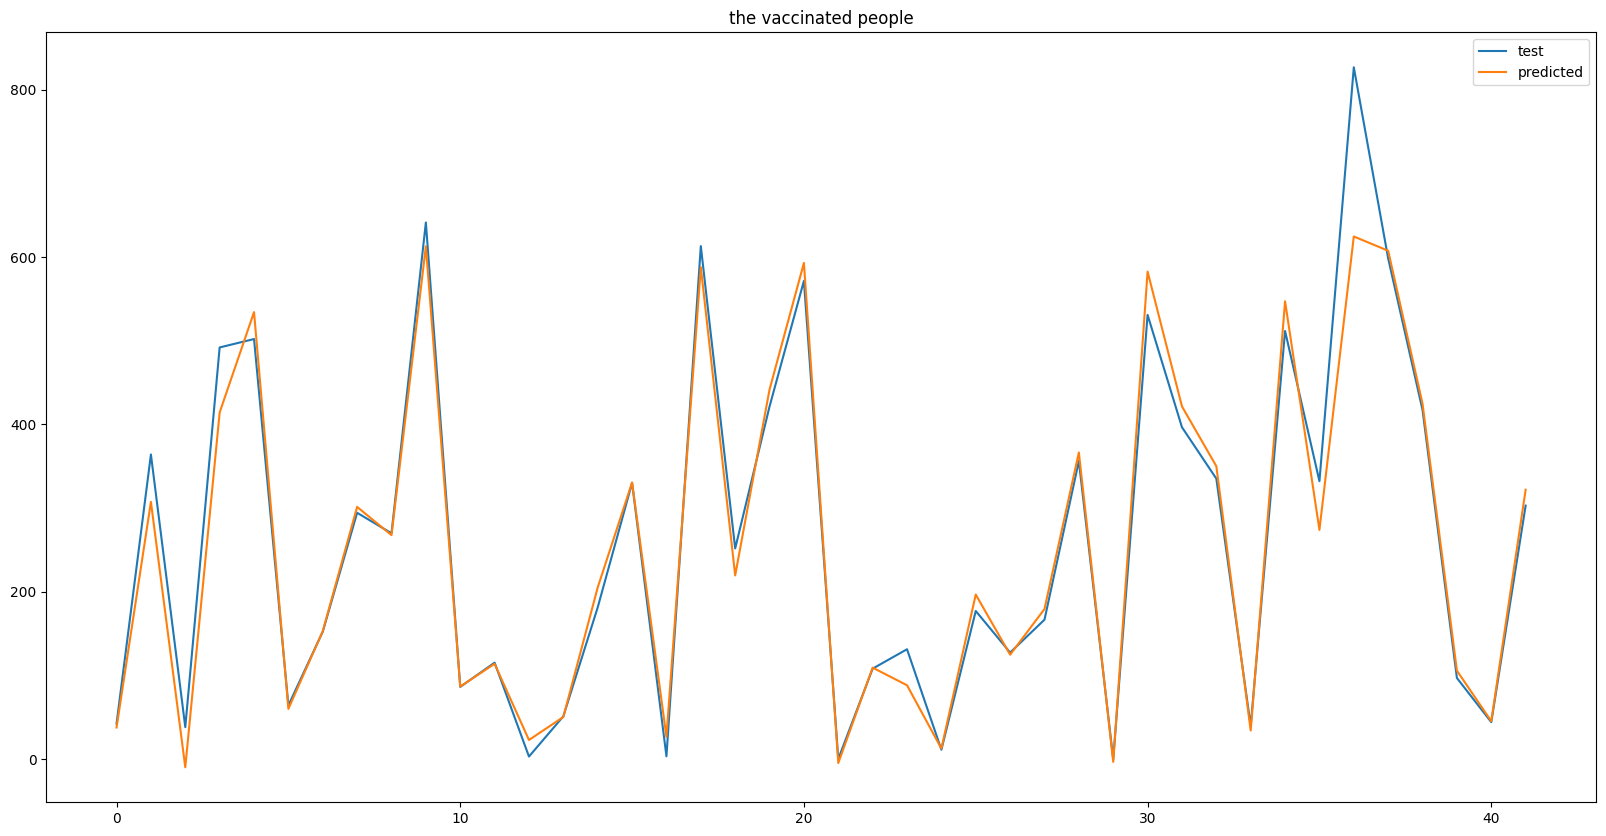

In [30]:
plt.figure(figsize=(20, 10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions_test, label="predicted")
plt.title("the vaccinated people")
plt.legend()
plt.show()

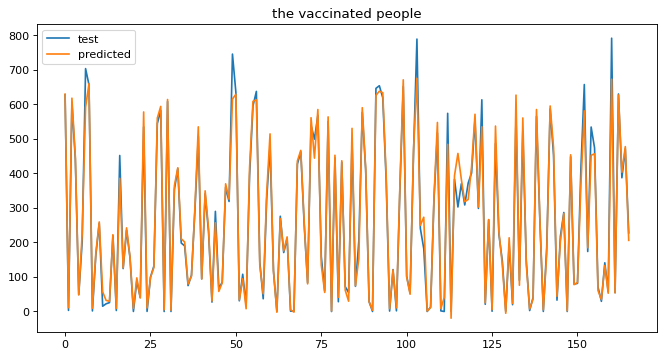

In [31]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, label="test")
plt.plot(x_ax, predictions_train, label="predicted")
plt.title("the vaccinated people")
plt.legend()
plt.show()

<Axes: xlabel='month', ylabel='total_vaccinations'>

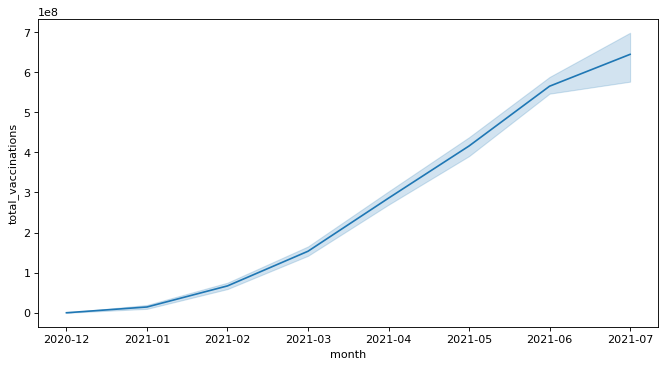

In [32]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='month', y='total_vaccinations', data=optimized_data)

<Axes: xlabel='year', ylabel='total_vaccinations'>

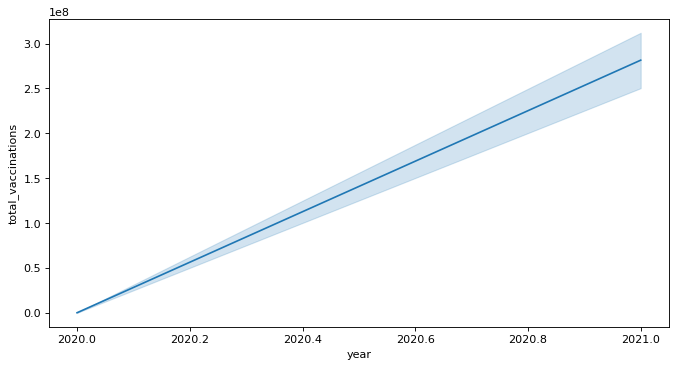

In [33]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='year', y='total_vaccinations', data=optimized_data)

## Save  final model

In [34]:
import joblib
joblib.dump(reg_mod,'reg_mod.pkl')

['reg_mod.pkl']